In [24]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")
from controllers.learner.datasets import get_hue_data, reshape_hue_data

In [25]:
import time
data = get_hue_data("sean", time.time()-100000000, time.time());

In [26]:
data[0]

{'lights': [{'bri': 254,
   'hue': 34497,
   'on': False,
   'reachable': True,
   'sat': 232},
  {'bri': 254, 'hue': 34497, 'on': False, 'reachable': True, 'sat': 232},
  {'bri': 254, 'hue': 15324, 'on': True, 'reachable': False, 'sat': 254}],
 'time': 1506587675.3029253}

In [27]:
from sklearn import preprocessing
import numpy as np
import datetime

times = [d["time"] for d in data]
earliest = min(times)
latest = max(times)

print(datetime.datetime.fromtimestamp(earliest).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.datetime.fromtimestamp(latest).strftime('%Y-%m-%d %H:%M:%S'))

light = []
for d_ in data:
    d = d_["lights"]
    light.append([int(d[1]["on"]), int(d[1]["bri"]), int(d[1]["hue"])])
light = np.array(light)
light = light * light[:,0][:,np.newaxis]
light = preprocessing.normalize(light, axis=0)
print(light.shape)

2017-09-09 03:31:45
2017-09-28 17:34:35
(35737, 3)


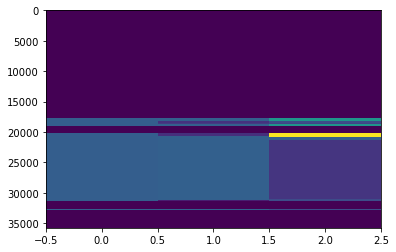

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(light,  aspect='auto')

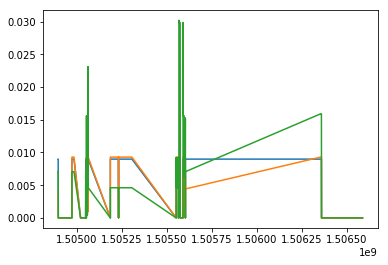

In [29]:
for i in range(light.shape[1]):
    plt.plot(times[:], light[:,i])

In [30]:
data_mat = reshape_hue_data(data)

In [31]:
print(data_mat.shape)
print(data_mat[0])

(35737, 15)
[  1.00000000e+00   0.00000000e+00   3.44970000e+04   2.32000000e+02
   2.54000000e+02   1.00000000e+00   0.00000000e+00   3.44970000e+04
   2.32000000e+02   2.54000000e+02   0.00000000e+00   1.00000000e+00
   1.53240000e+04   2.54000000e+02   2.54000000e+02]


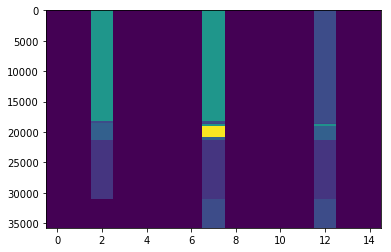

In [32]:
plt.imshow(data_mat, aspect="auto")

In [53]:
classes = list(set([tuple(row) for row in data_mat]))
n_classes = len(classes)
print(n_classes)

82


In [64]:
indices = [classes.index(tuple(row)) for row in data_mat]
counts = np.array([indices.count(i) for i in range(n_classes)])

In [65]:
count_dict = {index:count for index, count in zip(range(n_classes), counts)}

import operator
sorted_counts = sorted(count_dict.items(), key=operator.itemgetter(1), reverse=True)

print(sorted_counts)

[(47, 17684), (12, 3486), (29, 3398), (50, 2837), (44, 2060), (48, 1289), (16, 1204), (53, 524), (61, 509), (49, 402), (8, 371), (4, 295), (77, 245), (1, 239), (68, 161), (67, 99), (5, 94), (56, 92), (24, 87), (9, 85), (62, 64), (55, 63), (54, 50), (18, 41), (57, 39), (31, 35), (14, 34), (66, 31), (64, 28), (38, 25), (34, 24), (21, 14), (37, 13), (33, 12), (30, 8), (15, 7), (22, 7), (78, 7), (45, 6), (70, 6), (7, 5), (39, 4), (6, 3), (28, 3), (63, 3), (11, 2), (13, 2), (32, 2), (51, 2), (58, 2), (59, 2), (71, 2), (0, 1), (2, 1), (3, 1), (10, 1), (17, 1), (19, 1), (20, 1), (23, 1), (25, 1), (26, 1), (27, 1), (35, 1), (36, 1), (40, 1), (41, 1), (42, 1), (43, 1), (46, 1), (52, 1), (60, 1), (65, 1), (69, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (79, 1), (80, 1), (81, 1)]


In [70]:
top_classes = [classes[i] for i, n in sorted_counts[:5]]
print(top_classes)

[(1.0, 0.0, 34497.0, 232.0, 254.0, 1.0, 0.0, 34497.0, 232.0, 254.0, 0.0, 1.0, 15324.0, 254.0, 254.0), (0.0, 1.0, 10000.0, 0.0, 254.0, 0.0, 1.0, 10000.0, 200.0, 254.0, 0.0, 1.0, 10000.0, 200.0, 254.0), (0.0, 1.0, 10000.0, 0.0, 254.0, 0.0, 1.0, 10000.0, 144.0, 254.0, 0.0, 1.0, 10000.0, 140.0, 254.0), (0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 15327.0, 121.0, 112.0, 1.0, 0.0, 15324.0, 121.0, 254.0), (0.0, 1.0, 10000.0, 0.0, 254.0, 1.0, 1.0, 10000.0, 144.0, 254.0, 1.0, 1.0, 10000.0, 140.0, 254.0)]
